#                                        Restaurant Revenue Prediction

# **Introduction:**

Food industry plays a crucial part in the enhancement of the country’s economy. This mainly plays a key role in metropolitan cities. Where restaurants are essential parts of social gatherings and in recent days there are different varieties of quick-service restaurants like food trucks and takeaways. With this recent rise in restaurant types, it is difficult to decide when and where to open a new restaurant. 


**Overview of the competition:**

Over 1,200 quick service restaurants across the globe, TFI is the company where it owns several well-known restaurants across different parts of the Europe and Asia.They employ over 20,000 people in Europe and Asia and make significant daily investments in developing new restaurant sites.
We have been encountered with four different types of restaurants. They are inline, mobile, drive-thru, and food court. So deciding to open a new restaurant is challenging with these emerging quick-service restaurants.   

In recent days, even restaurant sites also include a large investment of time and capital. Geographical locations and cultures also impact the long-time survival of the firm.
With the subjective data, it is difficult to extrapolate the place where to open a new restaurant. So TF1 needs a model such that they can effectively invest in new restaurant sites. This competition is to predict the annual restaurant sales of 100,000 regional locations.


**Type of Machine learning problem:**

We are asked to predict the revenue of the restaurant in a given year, this problem can be best framed as a Regression problem.


# **Data Overview:**

Dataset: https://www.kaggle.com/c/restaurant-revenue-prediction/data

TFI company has provided a dataset with 137 restaurants in training phase and 100,000 restaurants for testing phase.
*   Id: Restaurant ID
*   Open Date: Opening date of a restaurant
*   City:  City where restaurant is located
*   City Group: Type of the city. Big cities, or Other.
*   Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru,   MB: Mobile
*   P1- P37: There are three categories of these obfuscated data.
    *   Demographic data are gathered from third party providers with GIS systems. 
These include population in any given area, age and gender distribution, development scales.
    *   Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.

    *  Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
*   Revenue: The revenue column indicates transformed revenue of the restaurant in a given year and is the target of predictive analysis

City, City Group, Type are categorical variables.\
P1-P37, Revenue are continuous variables.


# **Evaluation Metric:**

Let's discuss here with most efficient and commonly used evaluation metrics in regression problems.\
**Root Mean Squared Error(RMSE):** \
**RMSE** is the most popular evaluation metric where it follows an assumption that errors obtained are unbiased and follow a normal distribution. RMSE is the square root of average squared residuals/errors. \
Residuals = y_actual - y_predicted
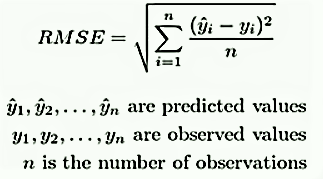

Here, the errors are squared before they get averaged, this implies that higher weight is assigned to larger errors which means model performance gets drastically affected when large errors are present. \
The **Squareroot** in RMSE makes the scale of the errors be in scale as the scale of the target variable. \
Example: Let's consider target variable 'revenue' has its unit in 'dollars', then RMSE will have its unit in 'dollars'. \
The **Square term** in RMSE prevents canceling the positive and negative error values. \
As RMSE is highly affected by outlier values, it is mandatory to handle outliers from the data before using this metric. 
Lower the value better is the performance of the model.

**Root Mean Squared Logarithmic Error(RMSLE):** \
**RMSLE** is similar to RMSE but where the error term is calculated at a logarithmic scale. \
In the case of RMSE, the presence of outliers increases the error term to a very large value. But, in the case of RMLSE, the outliers are drastically scaled-down. When we don't want to influence results, if there are large errors then RMSLE can be taken into consideration. \
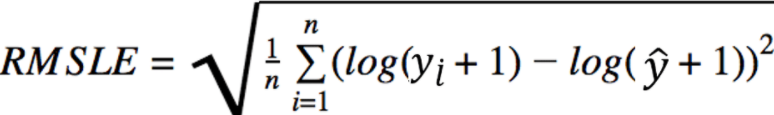
 \
Here we are adding 1 as a constant to both actual and predicted values because if the logarithmic term is 0 then it reaches infinitely large. \

Predicted value - SMALL &  Actual value - SMALL : RMSE and RMSLE are same \
Either Predicted value or  Actual value - LARGE : RMSE > RMSLE \
Predicted value - LARGE  &  Actual value - LARGE : RMSE > RMSLE

In this dataset, actual and predicted values are large. Hence we can consider RMSE as an evaluation metric.

In [ ]:
#pip install phik

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.tree import DecisionTreeRegressor
import phik
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Case study1/train.csv")
train.head(2)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Case study1/test.csv")
test.head(2)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [ ]:
print("train shape",train.shape,"test shape",test.shape)
print(train.columns)

train shape (137, 43) test shape (100000, 42)
Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


**Missing Values**

In [ ]:
#Returns a boolean value "True",  if there exists atleast one missing value in the column 
train.isna().any().any()

False

In [ ]:
test.isna().any().any()

False

**Analyzing target variable** - ***'revenue'***

In [ ]:
train['revenue'].describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

[Text(0.5, 1.0, 'Box Plot for Revenue variable')]

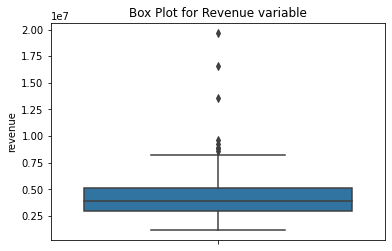

In [ ]:
sns.boxplot(y = train['revenue']).set(title="Box Plot for Revenue variable") #single vertical boxplot

In [ ]:
for i in range(90,100,1):
  print(i,"th percentile :",np.percentile(train['revenue'],i).round(3))

90 th percentile : 7045417.4
91 th percentile : 7213830.0
92 th percentile : 7506753.6
93 th percentile : 7723386.88
94 th percentile : 8157828.64
95 th percentile : 8683465.2
96 th percentile : 8899910.16
97 th percentile : 9234060.4
98 th percentile : 10750754.72
99 th percentile : 15478481.6


**Adding new features from 'Open Date' variable**

In [ ]:
#generating new features from 'Open Date' feature
def newFeatures(df):
  df['Date'] = pd.to_datetime(df['Open Date'],format="%m/%d/%Y")
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Years Old'] = pd.to_datetime('23-03-2015').year - df['Date'].dt.year
  df = df.drop(['Open Date','Date'],axis=1)
  return df

In [ ]:
#Reordering columns
def reorderingCols(train_data,test_data):
    train = train_data[['Id','City','City Group','Type','Year','Month','Years Old','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37','revenue']]
    test = test_data[['Id','City','City Group','Type','Year','Month','Years Old','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37']]
    return train,test

Handling Outliers

In [ ]:
#Even after logarithmic transformation of 'revenue' variable still there exists skewness. So lets drop few outliers.
def handlingOutliers(train):
  train = train[train['revenue']<train['revenue'].quantile(0.98)] 
  return train

Text(0.5, 1.0, 'Distribution plot for revenue')

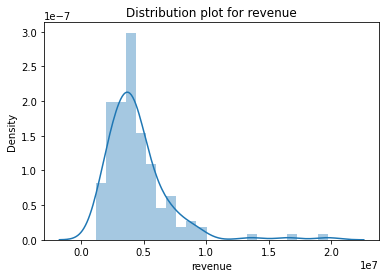

In [ ]:
#After dropping outliers distribution looks good
ax = sns.distplot(train['revenue'])            
ax.set_title("Distribution plot for revenue") 

Handling numerical

In [ ]:
def numFea(train_data):
    #To find highly correlated independent features.
    num_fea = train_data.drop(['Id','revenue','City Group','Type'],axis=1)
    corr = train_data.corr()
    #https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python
    upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))  #numerical features that are highly correlated with each other
    corr_col = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

    Phi_corr = train_data.drop(['Id'],axis=1).phik_matrix()
    fea = train_data.drop(['Id','revenue'],axis=1)
    Phi_corrFea = (Phi_corr['revenue'].sort_values(ascending=False)==0) #Features that have zero or no correlation with target variable
    no_cor = [col for col in fea.columns if Phi_corrFea[col]==True]

    drop_num = [col for col in corr_col if col not in no_cor]  #Dropping Features that are having zero correlation with the target variable but are highly correlated with other variables  
    return drop_num

Handling categorical

In [ ]:
def catFea(df):
  labelEncoding = LabelEncoder()
  df['City Group'] = labelEncoding.fit_transform(df['City Group'].astype('str'))
  df['Type'] = labelEncoding.fit_transform(df['Type'].astype('str'))
  return df

Splitting X & y

In [ ]:
#City can be dropped because there are 23 cities in test that are unseen during training phase
def split_X_y(train_data,test_data):
    y_train = train_data['revenue']
    X_train = train_data.drop(['Id','revenue','City'],axis=1)
    X_test = test_data.drop(['Id','City'],axis=1)
    return X_train,X_test,y_train

Stanadard Scaler follows standard normal distribution where mean is centered to zero and scales data to unit variance

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
def scaling(X_train,X_test):
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)
    return X_train_scale,X_test_scale

As there is high dimensionality in data we can use Principal Component Analysis(PCA). It helps in reducing the dimensions of data and focus on the ones with the largest variance components.


In [ ]:
from sklearn.decomposition import PCA
#https://www.geeksforgeeks.org/principal-component-analysis-with-python/
def principalComponentAnalysis(X_train,X_test):
    pca = PCA(n_components = 10)
    X_train_PCA = pca.fit_transform(X_train) 
    X_test_PCA = pca.transform(X_test) 
    return X_train_PCA,X_test_PCA

Feature Engineering Pipeline

In [ ]:
def featureEngineering(train,test):

    #generating new features
    train = newFeatures(train)
    test = newFeatures(test)
    
    #Reordering columns
    train,test = reorderingCols(train,test)
    

    #Handling numerical features
    dropnum = numFea(train)
    train  = train.drop(dropnum,axis=1)
    test = test.drop(dropnum,axis=1)
    print(dropnum)

    #Handling outliers
    train = handlingOutliers(train)

    #Handling categorical features
    train = catFea(train) 
    test = catFea(test) 
   

    #Split X & y
    X_train,X_test,y_train = split_X_y(train,test)
    print(X_train.columns)
    print(X_test.columns)

    #Standard Scaling
    X_train_scale,X_test_scale = scaling(X_train,X_test)

    #Principal Component Analysis
    X_train_PCA,X_test_PCA = principalComponentAnalysis(X_train,X_test)

    return X_train,X_test,X_train_scale,X_test_scale, X_train_PCA,X_test_PCA,y_train

In [ ]:
X_train,X_test,X_train_scale,X_test_scale, X_train_PCA,X_test_PCA,y_train = featureEngineering(train,test)

interval columns not set, guessing: ['Year', 'Month', 'Years Old', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']
['P12', 'P17', 'P18', 'P25', 'P28', 'P34']
Index(['City Group', 'Type', 'Year', 'Month', 'Years Old', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P13', 'P14', 'P15',
       'P16', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P26', 'P27', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P35', 'P36', 'P37'],
      dtype='object')
Index(['City Group', 'Type', 'Year', 'Month', 'Years Old', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P13', 'P14', 'P15',
       'P16', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P26', 'P27', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P35', 'P36', 'P37'],
      dtype='object')


In [ ]:
X_train.head(2)

,City Group,Type,Year,Month,Years Old,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P13,P14,P15,P16,P19,P20,P21,P22,P23,P24,P26,P27,P29,P30,P31,P32,P33,P35,P36,P37
0,0,2,1999,7,16,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5.0,1,2,2,5,4,1,3,3,1,1.0,4.0,3.0,5,3,4,5,4,3,4
1,0,1,2008,2,7,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5.0,0,0,0,3,2,1,3,2,0,0.0,0.0,3.0,0,0,0,0,0,0,0


In [ ]:
X_test.head(2)

,City Group,Type,Year,Month,Years Old,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P13,P14,P15,P16,P19,P20,P21,P22,P23,P24,P26,P27,P29,P30,P31,P32,P33,P35,P36,P37
0,1,1,2011,1,4,1,4.0,4.0,4.0,1,2,5,4,5,5,5,4.0,0,0,0,5,5,3,1,4,0,0.0,0.0,3.0,0,0,0,0,0,0,0
1,1,2,2011,3,4,3,4.0,4.0,4.0,2,2,5,3,4,4,2,5.0,0,0,0,5,5,3,2,1,0,0.0,0.0,3.0,0,0,0,0,0,0,0


In [ ]:
print(X_train.shape,' ',X_test.shape)

(134, 36)   (100000, 36)


In [ ]:
def predict_model(model,X,y_act):
    y_pred = model.predict(X)
    rms = mean_squared_error(y_act, y_pred,squared=False)
    return rms

In [ ]:
def testDataPred(model,X):
  y_test = model.predict(X)
  dataFrame = pd.DataFrame({'Id': test['Id'], 'Prediction': y_test}) 
  return dataFrame

# Lasso Regression

In [ ]:
from sklearn import linear_model
model_LR1 = linear_model.LassoCV(max_iter=10000,alphas=(0.0001,0.01,0.1,1),n_alphas=(100,300,500,1000),cv=5)
model_LR1.fit(X_train_scale,y_train)
LR_rmse1 = predict_model(model_LR1,X_train_scale,y_train)
print('Train RMSE score :',LR_rmse1)

Train RMSE score : 1553197.671562635


In [ ]:
my_submission = testDataPred(model_LR1,X_test_scale)
my_submission.to_csv('./submissionLR1.csv', sep = ',', index = False)

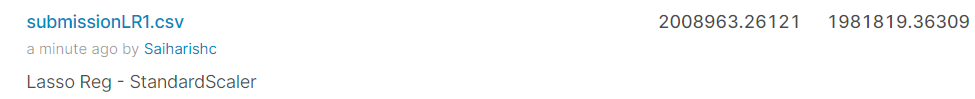

Applying PCA

In [ ]:
model_LR2 = linear_model.LassoCV(max_iter=10000,alphas=(0.0001,0.01,0.1,1),n_alphas=(100,300,500,1000),cv=5)
model_LR2.fit(X_train_PCA,y_train)
LR_rmse2 = predict_model(model_LR2,X_train_PCA,y_train)
print('Train RMSE score :',LR_rmse2)

Train RMSE score : 1710660.380771704


In [ ]:
my_submission = testDataPred(model_LR2,X_test_PCA)
my_submission.to_csv('./submissionLR2.csv', sep = ',', index = False)

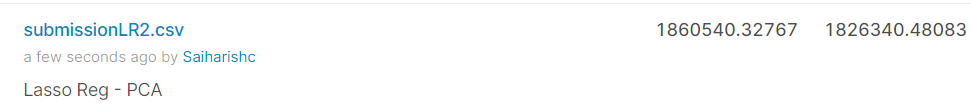

# Ridge regression

Applying standard scalar

In [ ]:
from sklearn.linear_model import RidgeCV
model_RR1 = RidgeCV(alphas=(0.0001,0.01,0.1,1,10),cv=5)
model_RR1.fit(X_train_scale,y_train)
RR_rmse1 = predict_model(model_RR1,X_train_scale,y_train)
print('Train RMSE score :',RR_rmse1)

Train RMSE score : 1584976.0829148134


In [ ]:
my_submission = testDataPred(model_RR1,X_test_scale)
my_submission.to_csv('./submissionRR1.csv', sep = ',', index = False)

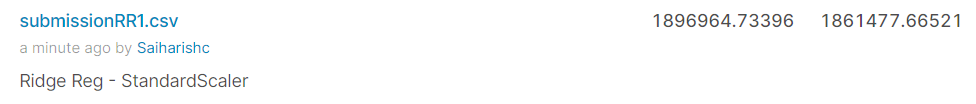

Applying PCA

In [ ]:
model_RR2 = RidgeCV(alphas=(0.0001,0.01,0.1,1,10),cv=5)
model_RR2.fit(X_train_PCA,y_train)
RR_rmse2 = predict_model(model_RR2,X_train_PCA,y_train)
print('Train RMSE score :',RR_rmse2)

Train RMSE score : 1710666.6082206795


In [ ]:
my_submission = testDataPred(model_RR2,X_test_PCA)
my_submission.to_csv('./submissionRR2.csv', sep = ',', index = False)

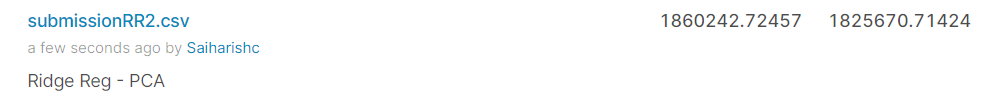

#Random Forest

Applying standard scalar

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": randint(10,1000),
    "max_depth": randint(1,10),
    "min_samples_split": uniform(0.1,0.8),
    'max_features':['auto', 'sqrt', 'log2']
}

RF_model = RandomForestRegressor()
model_rf1 = RandomizedSearchCV(RF_model, params, cv=6, n_iter=100, scoring='neg_mean_squared_error', return_train_score=True, verbose=3, n_jobs=-1)
model_rf1.fit(X_train_scale, y_train)
RF_rmse1 = predict_model(model_rf1, X_train_scale, y_train)
print('Train RMSE score :',RF_rmse1)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  5.0min


Train RMSE score : 1543802.2555810313


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.9min finished


In [ ]:
model_rf1.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.23792209677445195,
                      min_weight_fraction_leaf=0.0, n_estimators=124,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
my_submission = testDataPred(model_rf1,X_test_scale)
my_submission.to_csv('./submissionRF1.csv', sep = ',', index = False)

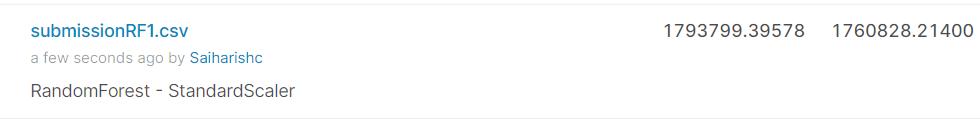

Applying PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators": randint(10,1000),
    "max_depth": randint(1,10),
    "min_samples_split": uniform(0.1,0.8),
    'max_features':['auto', 'sqrt', 'log2']
}

RF_model = RandomForestRegressor()
model_rf2 = RandomizedSearchCV(RF_model, params, cv=2, n_iter=100, scoring='neg_mean_squared_error', return_train_score=True, verbose=3, n_jobs=-1)
model_rf2.fit(X_train_PCA, y_train)
RF_rmse2 = predict_model(model_rf2, X_train_PCA, y_train)
print('Train RMSE score :',RF_rmse2)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.1min


Train RMSE score : 1656959.0980045574


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


In [ ]:
my_submission = testDataPred(model_rf2,X_test_PCA)
my_submission.to_csv('./submissionRF2.csv', sep = ',', index = False)

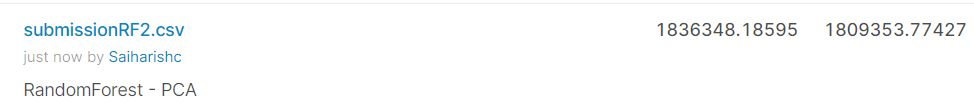

#XGBOOST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb
params = {
    "learning_rate": uniform(0.001,1),
    "n_estimators": randint(100,1000),
    "max_depth": randint(1,10),     
    "colsample_bytree": uniform(0.1,0.8),
    "reg_alpha": [0.0001,0.001,0.01,0.1,1,10],
    "reg_lambda": [0.0001,0.001,0.01,0.1,1,10]
}
xgb_model = xgb.XGBRegressor()
rand_xgb = RandomizedSearchCV(xgb_model, params, cv=2, n_iter=100, scoring='neg_mean_squared_error', return_train_score=True, verbose=3, n_jobs=-1)
rand_xgb.fit(X_train_scale, y_train)
XG_rmse1 = predict_model(rand_xgb, X_train_scale, y_train)
print('Train RMSE score :',XG_rmse1)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s


[04:15:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE score : 1355442.9950176715


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.7s finished


In [ ]:
rand_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8518734362309676, gamma=0,
             importance_type='gain', learning_rate=0.04566965063110151,
             max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
             n_estimators=590, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
my_submission = testDataPred(rand_xgb,X_test_scale)
my_submission.to_csv('./submissionXGB.csv', sep = ',', index = False)                             

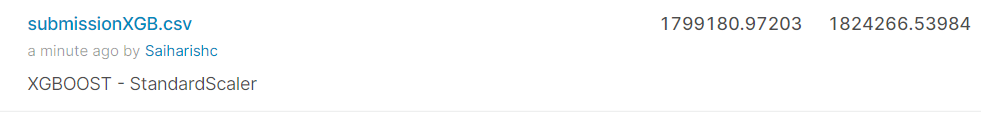

#Light GBM

GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "learning_rate": [0.01,0.1,1,10],
    "n_estimators": [100,300,500,700],
    "max_depth": [2,3,5,7],
    "colsample_bytree": [0.1,0.3,0.4],
    "reg_alpha": [0.0001,0.001,0.1],
    "reg_lambda": [0.0001,0.001,0.1,10]
}

lgb_model = lgb.LGBMRegressor()
grid_cv = GridSearchCV(lgb_model, param_grid, n_jobs=-1, cv=3, verbose=3, return_train_score=True)
grid_cv.fit(X_train_scale, y_train)
LG_rmse2 = predict_model(grid_cv, X_train_scale, y_train)
print('Train RMSE score :',LG_rmse2)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 3912 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6216 tasks      | elapsed:  2.5min


Train RMSE score : 1618060.1720193455


[Parallel(n_jobs=-1)]: Done 6912 out of 6912 | elapsed:  2.7min finished


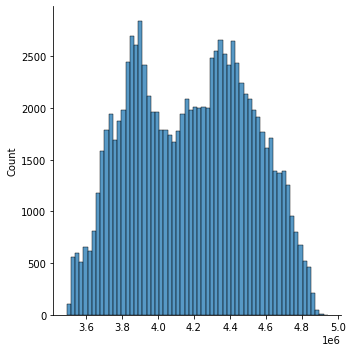

In [ ]:
y_pred_test = grid_cv.predict(X_test_scale)
my_submission = pd.DataFrame({'Id': test['Id'], 'Prediction': y_pred_test})
sns.displot(y_pred_test)
from google.colab import files    
my_submission.to_csv('./submissionLGG.csv', sep = ',', index = False)

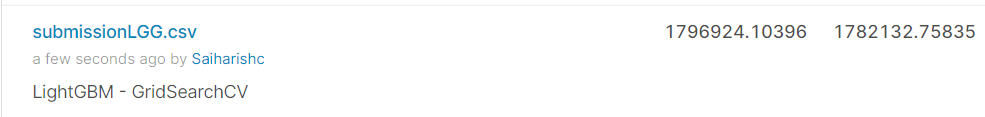

Applying standard scalar - RandomSearchCV

In [ ]:
params = {
    "learning_rate": uniform(0.001,1),
    "n_estimators": randint(100,1000),
    "max_depth": randint(1,10),
    "colsample_bytree": uniform(0.1,0.8),
    "reg_alpha": [0.0001,0.001,0.01,0.1,1,10],
    "reg_lambda": [0.0001,0.001,0.01,0.1,1,10]
}

lgb_model = lgb.LGBMRegressor()
rand_cv = RandomizedSearchCV(lgb_model, params, cv=6, n_iter=100, scoring='neg_mean_squared_error', return_train_score=True, verbose=3, n_jobs=-1)
rand_cv.fit(X_train_scale, y_train)
LG_rmse1 = predict_model(rand_cv, X_train_scale, y_train)
print('Train RMSE score :',LG_rmse1)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   27.5s


Train RMSE score : 1437867.7975091222


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   29.3s finished


In [ ]:
rand_cv.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.2092749743150673, importance_type='split',
              learning_rate=0.0077263698734734145, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=549, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.1, reg_lambda=1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
my_submission = testDataPred(rand_cv,X_test_scale)
my_submission.to_csv('./submissionLGR.csv', sep = ',', index = False)

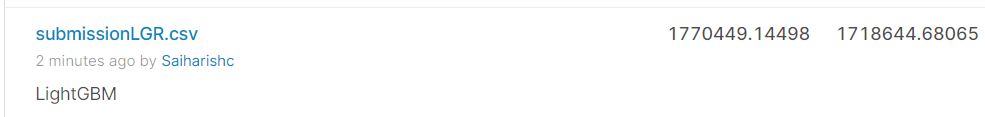

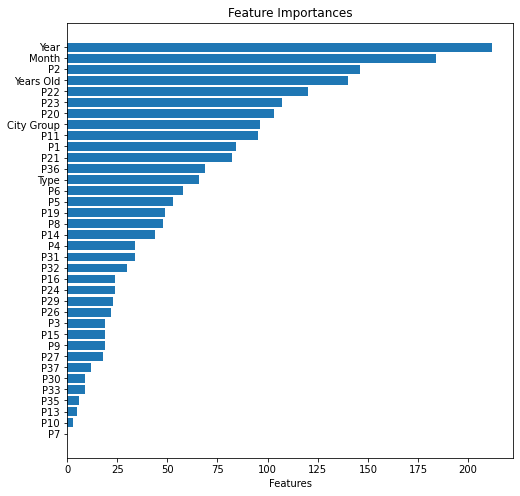

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
col_names = X_train.columns
importances = rand_cv.best_estimator_.feature_importances_
idxs = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)),[col_names[i] for i in idxs])
plt.xlabel('Features')
plt.show()

In [ ]:
import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rand_cv = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.2092749743150673, importance_type='split',
              learning_rate=0.0077263698734734145, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=549, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.1, reg_lambda=1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
rand_cv.fit(X_train_scale, y_train)
LG_rmse1 = predict_model(rand_cv, X_train_scale, y_train)
print('Train RMSE score :',LG_rmse1)  

Train RMSE score : 1437867.7975091222


In [ ]:
import pickle
pickle_out = open("LightRCV.pkl","wb")
pickle.dump(rand_cv,pickle_out)
pickle_out.close()

In [ ]:
from tabulate import tabulate 
#https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/
dict = {'Models'     : ['Lasso Regression - Standard scaling','Lasso Regression - PCA','Ridge Regression - Standard scaling','Ridge Regression - PCA','RF - Standard scaling - RandomSearchCV','RF - PCA - RandomSearchCV','XGBOOST - Standard scaling - RandomSearchCV','LightGBM - Standard scaling  - GridSearchCV','LightGBM - Standard scaling - RandomSearchCV' ],
        'Train RMSE' : [LR_rmse1,LR_rmse2,RR_rmse1,RR_rmse2,RF_rmse1,RF_rmse2,XG_rmse1,LG_rmse2,LG_rmse1],
        'Test RMSE'  : ['2008963.26121','1860540.32767','1896964.73396','1860242.72457','1793799.39578','1836348.18595','1799180.97203','1796924.10396','1770449.14498']  
        }
df = pd.DataFrame(dict)
print(tabulate(df, headers = 'keys', tablefmt = 'psql')) 

+----+----------------------------------------------+--------------+-------------+
|    | Models                                       |   Train RMSE |   Test RMSE |
|----+----------------------------------------------+--------------+-------------|
|  0 | Lasso Regression - Standard scaling          |  1.5532e+06  | 2.00896e+06 |
|  1 | Lasso Regression - PCA                       |  1.71066e+06 | 1.86054e+06 |
|  2 | Ridge Regression - Standard scaling          |  1.58498e+06 | 1.89696e+06 |
|  3 | Ridge Regression - PCA                       |  1.71067e+06 | 1.86024e+06 |
|  4 | RF - Standard scaling - RandomSearchCV       |  1.5438e+06  | 1.7938e+06  |
|  5 | RF - PCA - RandomSearchCV                    |  1.65696e+06 | 1.83635e+06 |
|  6 | XGBOOST - Standard scaling - RandomSearchCV  |  1.35544e+06 | 1.79918e+06 |
|  7 | LightGBM - Standard scaling  - GridSearchCV  |  1.61806e+06 | 1.79692e+06 |
|  8 | LightGBM - Standard scaling - RandomSearchCV |  1.43787e+06 | 1.77045e+06 |
+---

LightGBM - Standard scaling - RandomSearchCV |  1.45735e+06 | 1.77045e+06 \
Boosts score to 28th Position on Private leaderboard (Top 1.3%).